In [1]:
#Potrebné knižnice:
# as (alias) - sa využíva pre ľahší prístup ku knižniciam 
#Pandas je knižnica pre dátovú analýzu a manipuláciu s datasetmy a dátami
import pandas as pd

#Numpy je knižnica pre multidimenzionálne polia, matice a matematické funkcie
import numpy as np

#Seaborn je knižnica podobná matplotlib, pomáha vykreslovať informácie vo forme štatistických grafov
import seaborn as sns

#Matplotlib je knižnica pre knižnica pre vykreslovanie grafov, je rozšírením knižnice numpy
import matplotlib.pyplot as plt

#Sklearn je knižnica pre strojové učenie a prediktívnu analýzu  
import sklearn

#Keras je knižnica pre vytváranie neurónových sietí
import keras

In [2]:
#Pre ľahší prístup k funkciám knižníc si importujeme moduly ktoré potrebujeme:
 
#Sequential - sekvenčný model, definovaný ako lineárna postupnosť vrstiev  
from keras.models import Sequential

#Dense = označenie pravidelnej hlboko spojenej vrstvy pre neurónové siete, najčastejšie využívaná vrstva v kerase
from keras.layers import Dense

#to_categorical = funkcia, ktorá konvertuje vektor integerov na binárnu triedu
from keras.utils import to_categorical

#scipy - knižnica pre vedecké a technické výpočty, lineárnu algebru a pod.
#normaltest = test, ktorý overuje nulovú hypotézu a či sa dáta líšia od normálovej distribúcie
from scipy.stats import normaltest

#f1_score = priemer presnosti a senzitivity, najlepšia hodnota je 1 a najhoršia 0
#precision_score = presnosť s akou klasifikátor označuje správne/nesprávne výsledky, najlepšia hodnota je 1 a najhoršia 0
#recall_score = schopnosť klasifikátora nájsť všetky pozitívne vzorky
#accuracy_score = klasifikačné skóre presnosti
#classification_report = dokáže vypísať report s hlavnými klasifikačnými metrikami
#confusion_matrix = dokáže vypočítať a znázorniť maticu vyhodnotenia presnosti klasifikácie
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,classification_report,confusion_matrix

#train_test_split = funkcia, ktorá dokáže rozdeliť dáta na náhodné testovacie a trénovacie podmnožiny
from sklearn.model_selection import train_test_split

#StandardScaler - štandardizuje dáta odstránením priemeru a zmení ich podľa odchýlky dát 
from sklearn.preprocessing import StandardScaler

#RandomForestClassifier - klasifikátor, ktorý podmnožiny dát rozdelí do niekoľkých rozhodovacích stromov a využije
#spriemerovanie pre vylepšenie presnosti predikcie
from sklearn.ensemble import RandomForestClassifier

#LogisticRegression - klasifikátor, implementuje regularizovanú logistickú regresiu
#používame ho na modelovanie pravdepodobnosti pre existenciu triedy alebo udalosti, čo je v našom prípade smrť 
from sklearn.linear_model import LogisticRegression

In [3]:
#nastavenie štýlu grafov knižnice matplotlib
plt.style.use('default')

In [4]:
#načítanie datasetu z csv súboru do premennej data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv" , sep=",")

In [5]:
#zobrazenie prvých 5 riadkov dát z datasetu pre skontroľovanie dát
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
#zobrazenie počtu duplikátov v datasete
print("Počet duplikátov: ", data.duplicated().sum())

Počet duplikátov:  0


In [7]:
#informácie o datasete
data.info()
#v datasete máme 13 stĺpcov s 299 záznamami, datatypy sú číselné buď float alebo int
#jednotlivé stĺpce a ich reprezentácia sú:
#age - vek - celočíselná premenná - hodnoty 40 až 95 - min až max vek pacientov v datasete
#anaemia - chudoktvnosť - kategorická premenná  - hodnota 1/0 - chudokrvný/nechudokrvný
#creatinine_phosphokinase - kreatínkináza - celočíselná premenná - hodnota 23 až 7861 - výška enzýmu CPK v krvi
#diabetes - cukrovka - - kategorická premenná  - hodnota 1/0 - má/nemá cukrovku
#ejection_fraction - Ejekčná frakcia - celočíselná premenná - hodnota 14 až 80 - hodnota % krvi, ktorú vytlačí ľavá srdcová komora
#high_blood_pressure - vysoký krvný tlak - kategorická premenná  - hodnota 1/0 - má/nemá vysoký krvný tlak
#platelets - krvné doštičky - číselná premenná - hodnota 25100 až 850000 - množstvo krvných doštičiek v krvi
#serum_creatinine - kreatinín - číselná premenná - hodnota 0,5 až 9,4 - váška kreatinínu v krvi
#serum_sodium - sodík - celočíselná premenná - hodnota 113 až 148 - výška sodíku v krvi
#sex - pohlavie - - kategorická premenná  - hodnota 1/0 - Muž/Žena
#smoking - fajčenie - kategorická premenná  - hodnota 1/0 - fajčiar/nefajčiar                
#time - čas - celočíselná premenná - hodnota 4 až 285 - reprezentácia postupnosti času v dňoch
#DEATH_EVENT - úmrtie - kategorická premenná  - hodnota 1/0 - žije/zomrel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
#popis dát v datasete
data.describe()
#count - počet záznamov v danom stĺpci
#mean - priemerná hodnota v danom stĺpci
#std - smerodajná odchýlka v danom stĺpci
#min - minimálna hodnota v danom stĺpci
#25% - Q1 - prvý/dolný kvartil
#50% - Q2 - druhý kvartil/medián
#75% - Q3 - tretí/horný kvartil
#max - maximálna hodnota v danom stĺpci 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


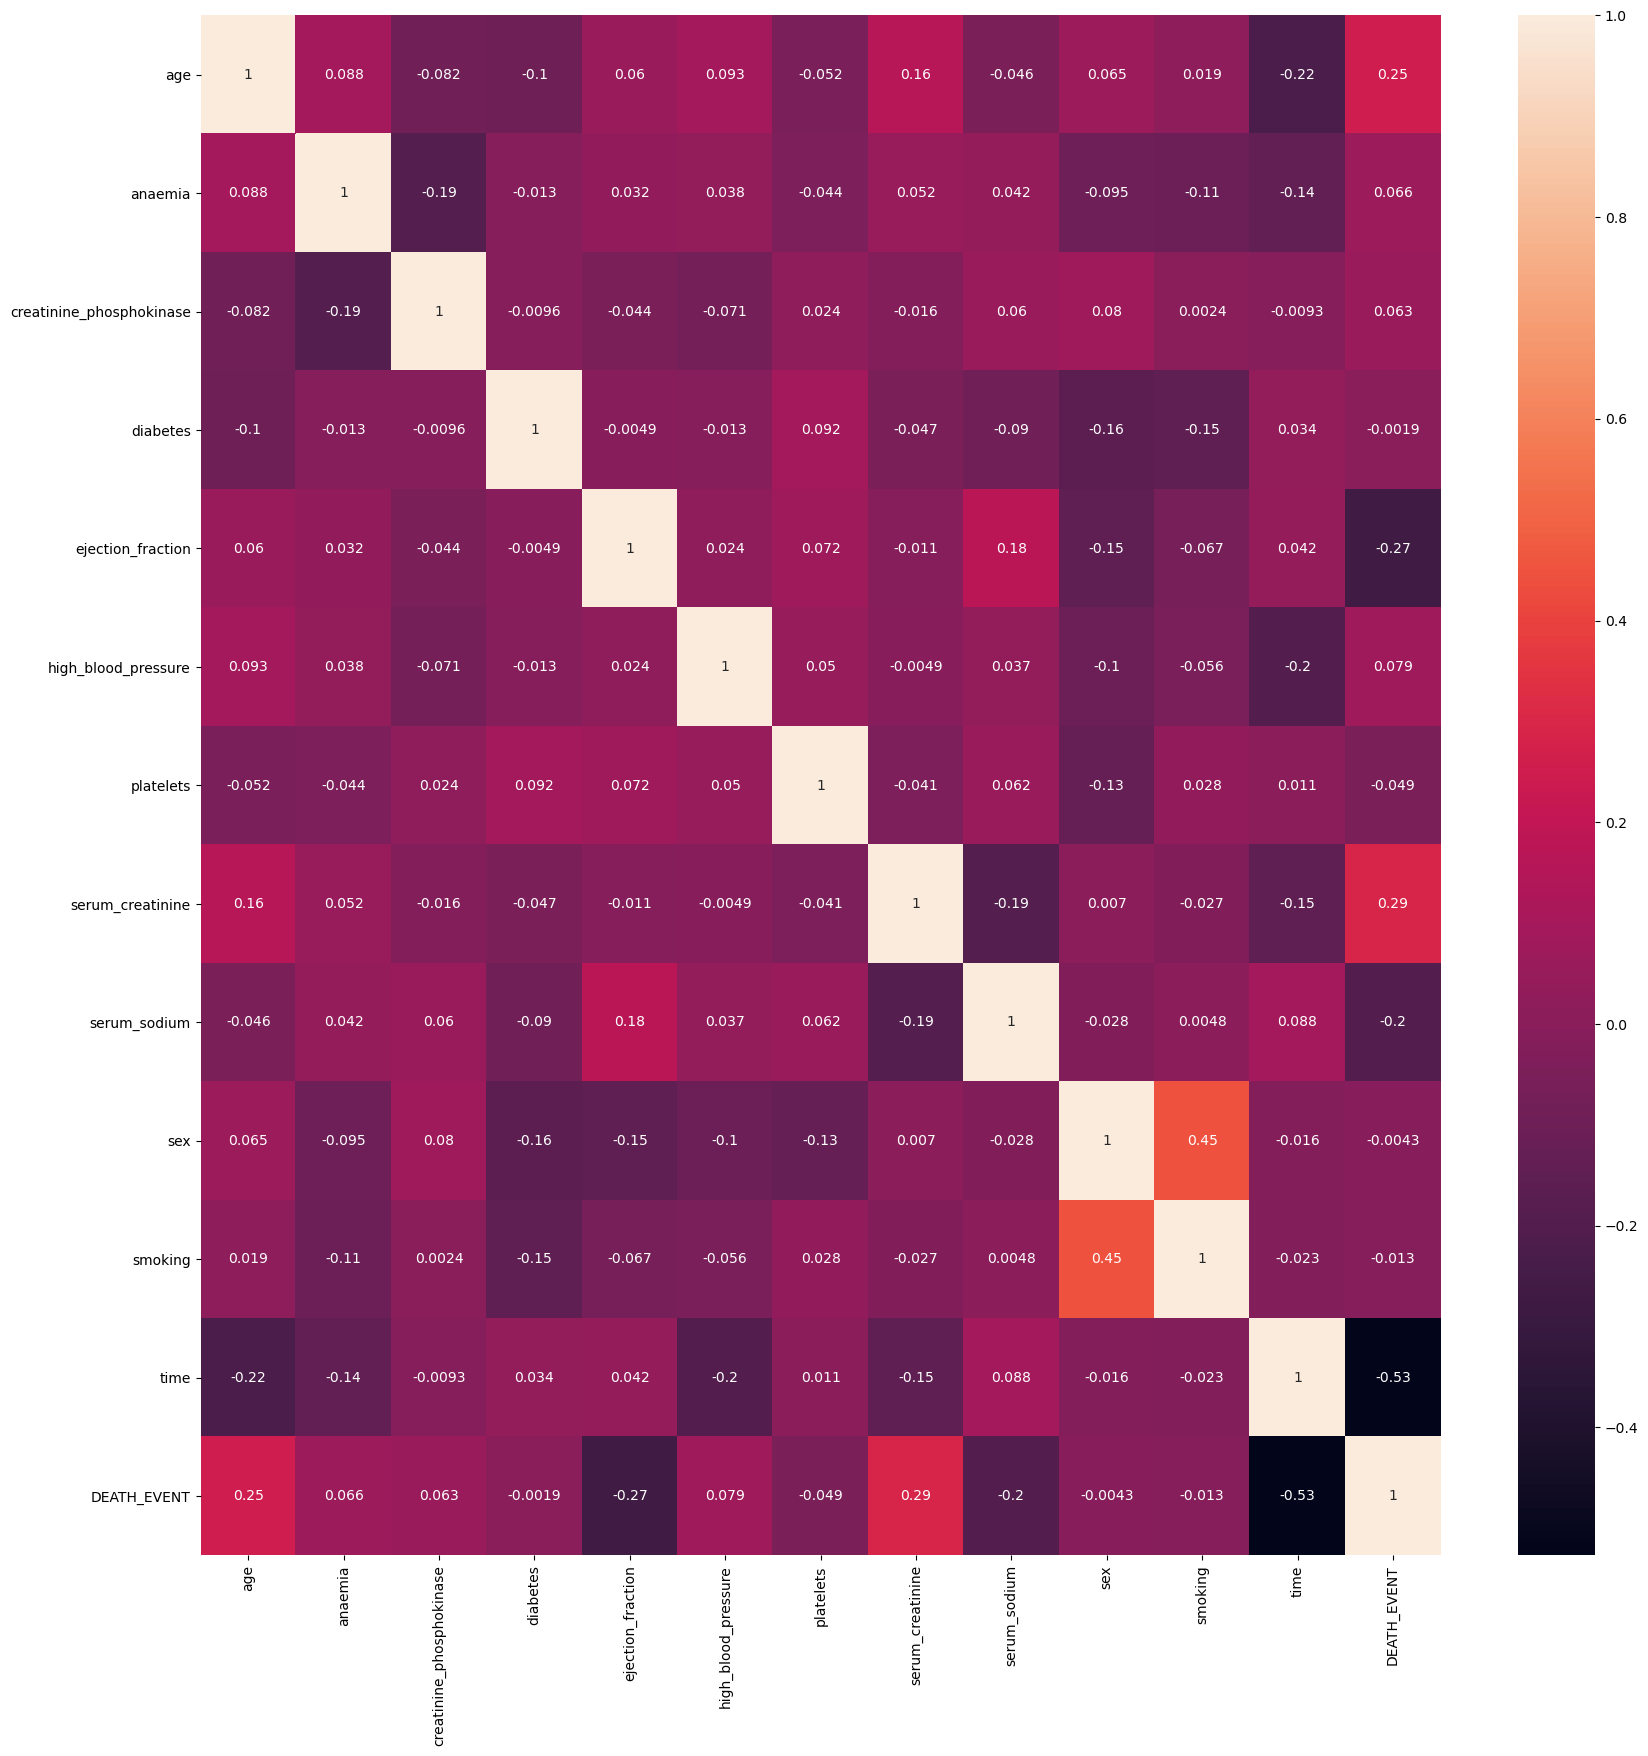

In [9]:
#vykreslenie párovej korelačnej analýzy dát z databázy
#korelácia rovnakých stĺpcov je vždy = 1
#čím je korelačné číslo menšie, tým je väčšia korelácia
corrMatrix = data.corr()
#nastavíme výšku a šírku grafu
plt.subplots(figsize=(20,20))
#pomocou knižnice seaborn vytvoríme heatmap, ktorý pre číselné hodnoty vytvorí graf s farebným vyzobrazením
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [10]:
# Z korelácií vidíme, že smrť malo najviac za príčinu:
# 1. time - čas
# 2. ejection_fraciton - ejekčná frakcia
# 3. serum_sodium
# Lineárnu koreláciu so smrťou má:
# 1. age - vek
# 2. serum_creatinine - kreatinín
# Usudzujeme teda, že hlavné atribúty sú time, ejection_fraction, age, serum_creatinine a serum_sodium

In [11]:
#Zmena kategorických dát na kategórie
# z typov int a float dáme jednotlivým kategorickým triedam typ category
data['anaemia'] = data['anaemia'].astype('category')
data['diabetes'] = data['diabetes'].astype('category')
data['high_blood_pressure'] = data['high_blood_pressure'].astype('category')
data['smoking'] = data['smoking'].astype('category')
data['sex'] = data['sex'].astype('category')
data['DEATH_EVENT'] = data['DEATH_EVENT'].astype('category')
#všetky nekategorické jednotky si dáme do samostatnej premennej
nekategoricke = ['creatinine_phosphokinase', 'platelets', 'ejection_fraction', 'serum_sodium',
        'serum_creatinine', 'time', 'age']

In [12]:
#mode - modus/najčastejšia hodnota
#vypíšeme si najčastejšie sa vyskytujúcu hodnotu z nekategorických premenných
data[nekategoricke].mode()

,creatinine_phosphokinase,platelets,ejection_fraction,serum_sodium,serum_creatinine,time,age
0,582.0,263358.03,35.0,136.0,1.0,187,60.0
1,NaN,NaN,NaN,NaN,NaN,250,NaN


In [13]:
#Z popisu vyšie, vieme zistiť:
# Väčšina pacientov má 60 rokov,
# Bola kardiovaskulárnym pacientom 187 až 250 dní,
# Mali 1 mg/dL kreatinínu v krvi,
# Mali 136mEg/L sodíku v krvi,
# Ľavá strana srdca vytláčala 35% krvi,
# Mali 263358 kiloplatelets/mL,
# Mali 582 mcg/L enzýmu CPK v krvi.

<AxesSubplot:title={'center':'Pohlavie \n 0: Žena | 1: Muž '}, ylabel='sex'>

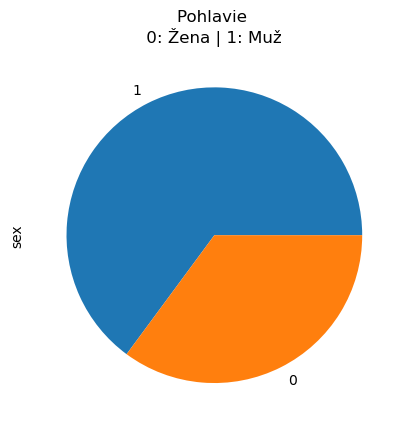

In [14]:
#Exploračná analýza
#Rozdelenie pohlaví
#pomocou value_counts() si necháme spočítať rozdielne hodnoty čiže: počet 0 a 1 v triede sex
#pomocou plot() vykreslíme graf typu: koláčový, s nadpisom Pohlavie s významom hodnôt
data['sex'].value_counts().plot(kind = 'pie', title='Pohlavie \n 0: Žena | 1: Muž ')

In [15]:
#percentuálny podieľ zobrazený na grafe si vieme ukázať aj pomocou číselného zápisu
#percentuálny podieľ vypočítame ako spočítanie jednotlivých hodnôt 0 a 1 a následne ich vydelením celkového počtu
#(count/sum)*100
(data['sex'].value_counts()/sum(data['sex'].value_counts()))*100

1    64.882943
0    35.117057
Name: sex, dtype: float64

In [16]:
#Z rozdelenia pohlaví vidíme, že väčšinové zastúpenie v tomto datasete majú muži

<AxesSubplot:title={'center':'Úmrtia \n (0: Prežili | 1: Zomreli )'}, ylabel='DEATH_EVENT'>

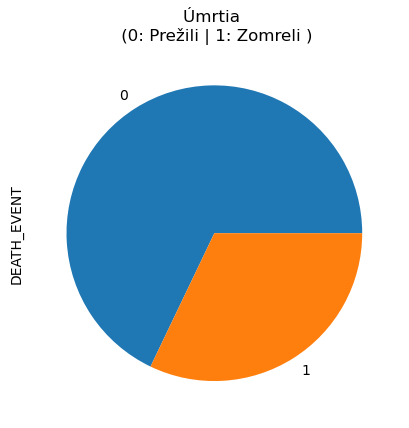

In [17]:
#Rozdelenie úmrtí
#pomocou value_counts() si necháme spočítať rozdielne hodnoty čiže: počet 0 a 1 v triede DEATH_EVENT
#pomocou plot() vykreslíme graf typu: koláčový, s nadpisom Úmrtia s významom hodnôt
data['DEATH_EVENT'].value_counts().plot(kind='pie', title='Úmrtia \n (0: Prežili | 1: Zomreli )')

In [18]:
#percentuálny podieľ zobrazený na grafe si vieme ukázať aj pomocou číselného zápisu
#percentuálny podieľ vypočítame ako spočítanie jednotlivých hodnôt 0 a 1 a následne ich vydelením celkového počtu
#(count/sum)*100
(data['DEATH_EVENT'].value_counts()/sum(data['DEATH_EVENT'].value_counts()))*100

0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64

In [19]:
#Z rozdelenia úmrtí môžeme dedukovať, že u väčšiny pacientov nenastala smrť

<AxesSubplot:title={'center':'Fajčenie \n (0: Nefajčiar | 1: Fajčiar )'}, ylabel='smoking'>

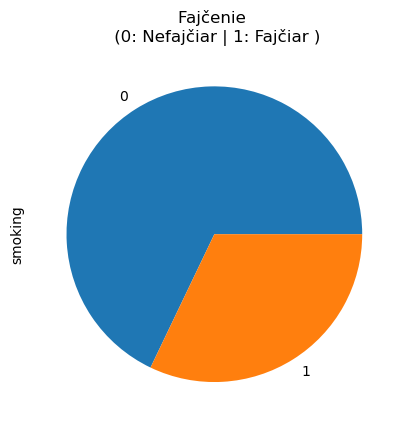

In [20]:
#Rozdelenie fajčiarov
#pomocou value_counts() si necháme spočítať rozdielne hodnoty čiže: počet 0 a 1 v triede smoking
#pomocou plot() vykreslíme graf typu: koláčový, s nadpisom Fajčenie s významom hodnôt
data['smoking'].value_counts().plot(kind = 'pie', title = 'Fajčenie \n (0: Nefajčiar | 1: Fajčiar )')

In [21]:
#percentuálny podieľ zobrazený na grafe si vieme ukázať aj pomocou číselného zápisu
#percentuálny podieľ vypočítame ako spočítanie jednotlivých hodnôt 0 a 1 a následne ich vydelením celkového počtu
#(count/sum)*100
(data['smoking'].value_counts()/sum(data['smoking'].value_counts()))*100

0    67.892977
1    32.107023
Name: smoking, dtype: float64

In [22]:
#Z rozdelenia fajčiarov usudzujeme, že väčšina pacientov nefajčila

<AxesSubplot:title={'center':'Cukrovka \n (0: Nemá cukrovku | 1: Má cukrovku )'}, ylabel='diabetes'>

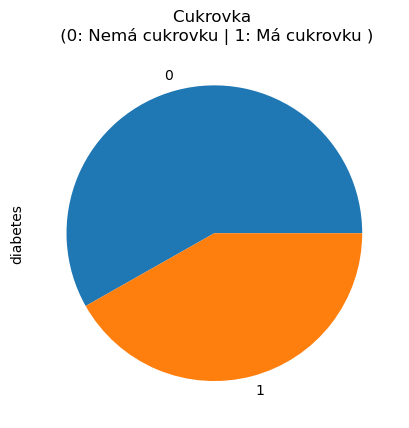

In [23]:
#Rozdelenie pacientov s cukrovkou
#pomocou value_counts() si necháme spočítať rozdielne hodnoty čiže: počet 0 a 1 v triede diabetes
#pomocou plot() vykreslíme graf typu: koláčový, s nadpisom Cukrovka s významom hodnôt
data['diabetes'].value_counts().plot(kind= 'pie', title = 'Cukrovka \n (0: Nemá cukrovku | 1: Má cukrovku )')

In [24]:
#percentuálny podieľ zobrazený na grafe si vieme ukázať aj pomocou číselného zápisu
#percentuálny podieľ vypočítame ako spočítanie jednotlivých hodnôt 0 a 1 a následne ich vydelením celkového počtu
#(count/sum)*100
(data['diabetes'].value_counts()/sum(data['diabetes'].value_counts()))*100

0    58.19398
1    41.80602
Name: diabetes, dtype: float64

In [25]:
#Z grafu vyššie vieme povedať, že väčšina z pacientov netrpí cukrovkou

<AxesSubplot:title={'center':'Vysoký krvný tlak - VKT \n (0: Má VKT | 1: Nemá VKT )'}, ylabel='high_blood_pressure'>

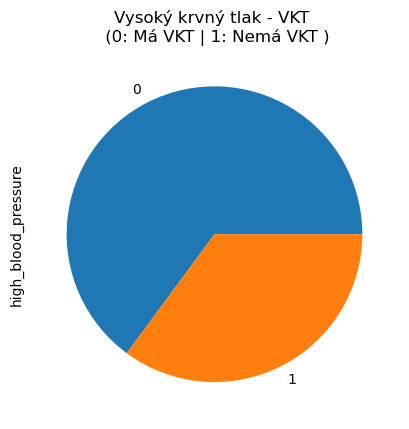

In [26]:
#Rozdelenie pacientov s vysokým krvným tlakom
#pomocou value_counts() si necháme spočítať rozdielne hodnoty čiže: počet 0 a 1 v triede high_blood_pressure
#pomocou plot() vykreslíme graf typu: koláčový, s nadpisom Vysoký krvný tlak s významom hodnôt
data['high_blood_pressure'].value_counts().plot(kind = 'pie', title= 'Vysoký krvný tlak - VKT \n (0: Má VKT | 1: Nemá VKT )')

In [27]:
#percentuálny podieľ zobrazený na grafe si vieme ukázať aj pomocou číselného zápisu
#percentuálny podieľ vypočítame ako spočítanie jednotlivých hodnôt 0 a 1 a následne ich vydelením celkového počtu
#(count/sum)*100
(data['high_blood_pressure'].value_counts()/sum(data['high_blood_pressure'].value_counts()))*100

0    64.882943
1    35.117057
Name: high_blood_pressure, dtype: float64

In [28]:
#Podľa grafu rozdelenia vidíme, že väčšina pacientov nemá problém s vysokým krvným tlakom

<AxesSubplot:xlabel='sex'>

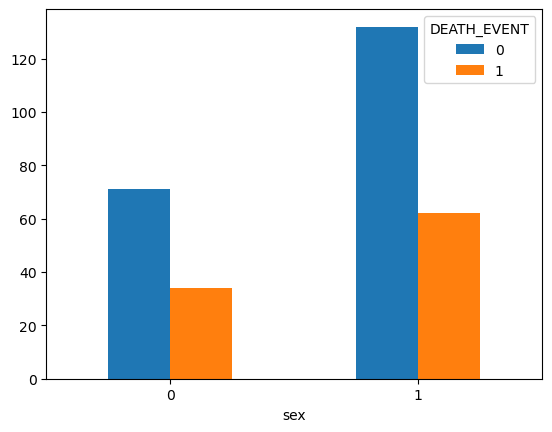

In [29]:
#pomocou knižnice pandas vytvoríme krížovú tabuľku pre hodnoty dvoch tried a zobrazíme ju ako stĺpový graf
#v tomto prípade sa jedná o triedy pohlavie a úmrtie
#na X-ovej osy máme zobrazené pohlavia, 0- žena, 1-muž
#na Y-ovej osy je zobrazené či nastalo/nenastalo úmrtie pre jednotlivé pohlavia
#rot označuje otočenie označenia hodnôt v X-ovej časti grafu
pd.crosstab(data['sex'], data['DEATH_EVENT']).plot(kind = 'bar', rot = 0)

In [30]:
#Z grafu vyššie vieme povedať, že z celého datasetu majú väčšiu úmrtnosť muži

<AxesSubplot:xlabel='anaemia'>

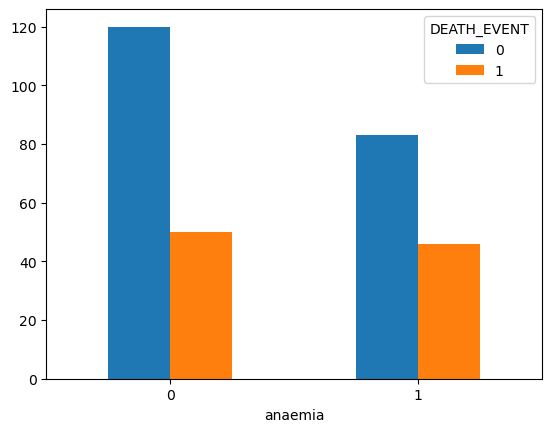

In [31]:
#pomocou knižnice pandas vytvoríme krížovú tabuľku pre hodnoty dvoch tried a zobrazíme ju ako stĺpový graf
#v tomto prípade sa jedná o triedy chudokrvnosť a úmrtie
#na X-ovej osy máme zobrazenú chudokrvnosť, 0- nechudokrvný, 1- chudokrvný
#na Y-ovej osy je zobrazené či nastalo/nenastalo úmrtie
#rot označuje otočenie označenia hodnôt v X-ovej časti grafu
pd.crosstab(data['anaemia'], data['DEATH_EVENT']).plot(kind = 'bar', rot = 0)

In [32]:
#Z grafu vieme vyčítať, že zomrelo viacej ľudí, ktorý netrpeli chudokrvnosťou

<AxesSubplot:xlabel='diabetes'>

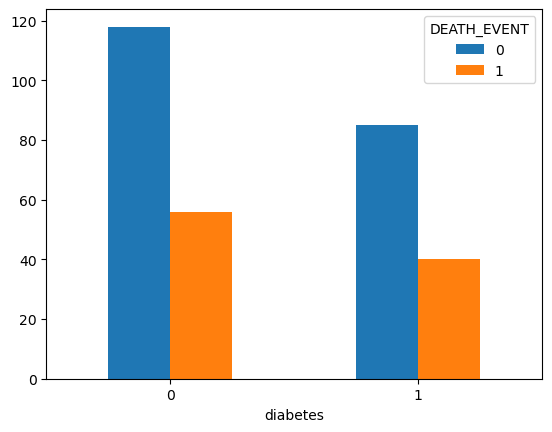

In [33]:
#pomocou knižnice pandas vytvoríme krížovú tabuľku pre hodnoty dvoch tried a zobrazíme ju ako stĺpový graf
#v tomto prípade sa jedná o triedy cukrovka a úmrtie
#na X-ovej osy máme zobrazenú cukrovku, 0- nemá cukrovku, 1- má cukrovku
#na Y-ovej osy je zobrazené či nastalo/nenastalo úmrtie
#rot označuje otočenie označenia hodnôt v X-ovej časti grafu
pd.crosstab(data['diabetes'], data['DEATH_EVENT']).plot(kind = 'bar', rot = 0)

In [34]:
#Z grafu vieme vyčítať, že zomrelo viacej ľudí, ktorý nemali cukrovku 

<AxesSubplot:xlabel='high_blood_pressure'>

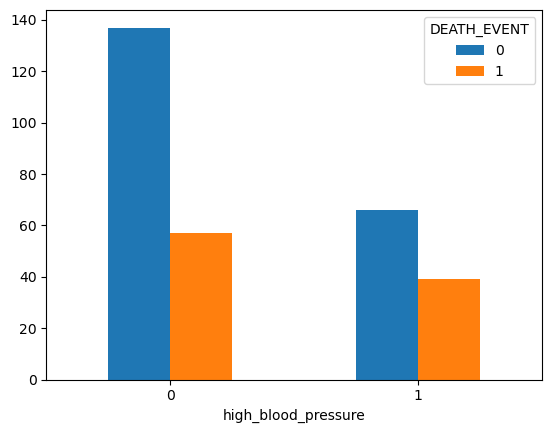

In [35]:
#pomocou knižnice pandas vytvoríme krížovú tabuľku pre hodnoty dvoch tried a zobrazíme ju ako stĺpový graf
#v tomto prípade sa jedná o triedy vysoký krvný tlak a úmrtie
#na X-ovej osy máme zobrazené chudokrvnosť, 0- nemá vysoký krvný tlak, 1- má vysoký krvný tlak
#na Y-ovej osy je zobrazené či nastalo/nenastalo úmrtie
#rot označuje otočenie označenia hodnôt v X-ovej časti grafu
pd.crosstab(data['high_blood_pressure'], data['DEATH_EVENT']).plot(kind = 'bar', rot = 0)

In [36]:
#Z grafu vieme vyčítať, že zomrelo viacej ľudí, ktorý netrpeli vysokým krvným tlakom

<AxesSubplot:xlabel='smoking'>

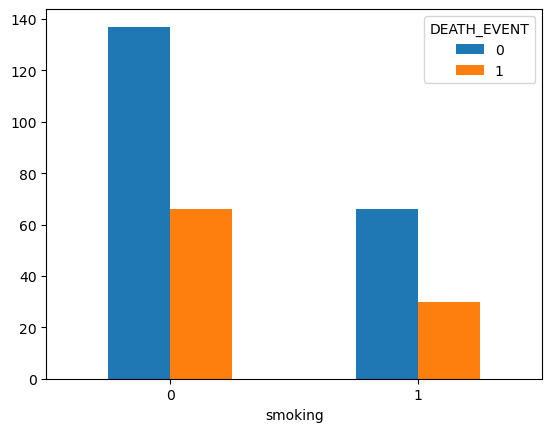

In [37]:
#pomocou knižnice pandas vytvoríme krížovú tabuľku pre hodnoty dvoch tried a zobrazíme ju ako stĺpový graf
#v tomto prípade sa jedná o triedy fajčenie a úmrtie
#na X-ovej osy máme zobrazené fajčenie, 0- nejačiar, 1- fajčiar
#na Y-ovej osy je zobrazené či nastalo/nenastalo úmrtie
#rot označuje otočenie označenia hodnôt v X-ovej časti grafu
pd.crosstab(data['smoking'], data['DEATH_EVENT']).plot(kind = 'bar', rot = 0)

In [38]:
#Z grafu vieme vyčítať, že zomrelo viacej ľudí, ktorý nefajčili

In [39]:
#premenná death obsahuje všetky údaje z databázy, kde je hodnota smrť 1 a teda pacient zomrel
death = data[data['DEATH_EVENT'] == 1]
#následne vymažeme triedu/stĺpec DEATH_EVENT
death.drop(columns=['DEATH_EVENT'], inplace=True)

D:\Programy\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
#Test normálového rozloženia, overenie hypotézy normálového rozdelenia dát
#Nulová hypotéza: dáta X sú z normálového rozloženia
#chceme zistiť, ktoré z premenných sú z alebo sa približujú normálovému rozdeleniu
#definujeme si funkciu normaltest, ktorá z datasetu death. kde všetci pacienti zomreli
def NormalTest(cols=nekategoricke, data=death):
    #pripravíme si premennú do ktorej vložíme triedy, ktoré majú normálové rozloženie
    norma_attr = []
    #prechádzame jednotlivými triedami/stĺpcami
    for u in cols:
        #p je chí kvadrát hypotézy, ktorý použijeme na potvrdenie alebo vyvrátenie hypotézy, k2 je z-skóre kurtosis testu
        k2, p = normaltest(data[u])  
        #ak je p menšie než 0.001 (šanca 1:1000), čo označuje veľmi silný dôkaz proti nulovej hypotéze 
        if p < 0.001:
            #ak sa podmienka potvrdí a teda máme silný dôkaz pre zamietnutie hypotézy
            print(f'Pre {u}: Môžeme nulovú hypotézu zamietnuť. pvalue={p}')
        else:
            #ak sa podmienka nepotvrdí, znamená to, že nulovú hypotézu potvrdujeme a následne zapisujeme dáta do premennej
            print(f'Pre {u}: Nemôžeme zamietnuť nulovú hypotézu. pvalue={p}')
            norma_attr.append(u)
    #Vypíšeme, ktoré triedy/stĺpce sú z normálového rozloženia        
    print(f'\nAtribúty z normálového rozloženia: {norma_attr}.')
    #ako návratový typ odosielame triedy/stĺpce, ktoré sú z normálového rozloženia
    return norma_attr

In [41]:
#do premennej normal_cols necháme zapísať výsledky normálového testu distribúcie
normal_cols = NormalTest()

Pre creatinine_phosphokinase: Môžeme nulovú hypotézu zamietnuť. pvalue=1.06758875232229e-25
Pre platelets: Nemôžeme zamietnuť nulovú hypotézu. pvalue=0.004876523292516175
Pre ejection_fraction: Nemôžeme zamietnuť nulovú hypotézu. pvalue=0.0066182733411390155
Pre serum_sodium: Môžeme nulovú hypotézu zamietnuť. pvalue=0.00072544971629459
Pre serum_creatinine: Môžeme nulovú hypotézu zamietnuť. pvalue=2.714886158316834e-21
Pre time: Môžeme nulovú hypotézu zamietnuť. pvalue=0.000620382184129301
Pre age: Nemôžeme zamietnuť nulovú hypotézu. pvalue=0.10803960470838643

Atribúty z normálového rozloženia: ['platelets', 'ejection_fraction', 'age'].


In [42]:
#Pre výsledné atribúty nekategorických dát: krvné doštičky, ejekčná frakcia a vek budeme skúmať ktoré zapríčiňujú smrť

In [43]:
#ako hlavné premenné pre príčinu smrti si zvolíme triedy v premennej col, čiže:
#čas, ejekčná frakcia, kreatinín, vek a sodík
col = ['time','ejection_fraction','serum_creatinine','age','serum_sodium']
#predictor označuje dáta za ktorých pomoci sa budeme snažiť odhadovať či nastane alebo nenastane smrť
predictor = data[col]
#ako premennú, ktorú označujeme za cieľovú a teda chceme vedieť či nastane alebo nenastane smrť zvolíme DEATH_EVENT
target = data["DEATH_EVENT"]
#premenné do ktorých rozdelíme celý náš dataset
#delíme ich pomocou train_test_split, ktorý rozdelí dáta podľa požadovanej veľkosti na trénovacie a testovacie,
#v našom prípade 3:7, čiže 30% bude v testovacej množine a 70% v trénovacej
#random_state zaručí, že dáta nebudú pri viacerých spusteniach rovnako rozdelené
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.3, random_state = 42)
#vypíšeme si ako sú tvarované premenné, čísla reprezentujú (záznamy, triedy) resp. (riadky, stĺpce)
print(X_train.shape)
print(X_test.shape)

(209, 5)
(90, 5)


In [44]:
#StandardScaler má za úlohu odstrániť stredové hodnoty a dáta zoškálovať podľa rozptylu
#štandardizuje sa pomocou xscaled=(x-u)/s kde u je priemerná hodnota alebo 0, s je štandartná odchýlka
#dáta potrebujeme mať štandardizované okolo normálovej distribúcie, pre využitie v strojovom učení musíme odstrániť všetky
#hodnoty, ktoré by boli mimo normálového rozloženia
#takéto hodnoty by mohli nepriaznivo ovplyvniť učenie a algoritmus by mohol zle predikovať a vyhodnocovať dáta 
sc = StandardScaler()
#fit_transform používame na trénovacie množiny aby sme škálovali trénovacie dáta a naučili sa škláovacie parametre pre dáta
#tieto naučené parametre sa následne využijú na škálovanie testovacích dát
#metóda fit vypočíta priemernú hodnotu a rozptyl dát. transform následne prepočítava dáta podľa priemeru a rozptylu
X_train = sc.fit_transform(X_train)
#využijeme už zapamätané parametre priemeru a rozptylu na prepočítanie dát(transformáciu)
X_test = sc.transform(X_test)

[[50  3]
 [15 22]]
Presnosť modelu Logistic Regression:  80.0
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        53
           1       0.88      0.59      0.71        37

    accuracy                           0.80        90
   macro avg       0.82      0.77      0.78        90
weighted avg       0.81      0.80      0.79        90



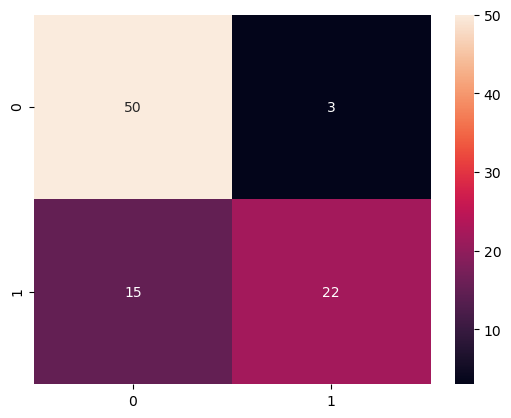

In [45]:
#Logistic Regression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

acc_logisticregression = round(accuracy_score(y_pred, y_test) * 100, 2)
print ("Presnosť modelu Logistic Regression: ", acc_logisticregression) 
print(classification_report(y_test, y_pred))

In [46]:
#RandomForest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print("Presnosť modelu Random Forest : ",acc_randomforest)
print(classification_report(y_test, y_pred))

Presnosť modelu Random Forest :  76.67
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        53
           1       0.83      0.54      0.66        37

    accuracy                           0.77        90
   macro avg       0.79      0.73      0.74        90
weighted avg       0.78      0.77      0.75        90



In [47]:
#Keras
# !!! POKIAĽ KERAS VYPISUJE CHYBU PROSÍM REŠTARTUJTE KERNEL A ZNOVU ZBEHNITE CELÝ KÓD !!!
#vytvorenie sekvenčného modelu pre predikciu
#sekvenčný model
modelKe = Sequential()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

modelKe.add(Dense(500, activation = 'relu', input_dim=5))
modelKe.add(Dense(100, activation = 'relu'))
modelKe.add(Dense(50, activation = 'relu'))
modelKe.add(Dense(2, activation = 'softmax'))

#
modelKe.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#začneme s trénovaním modelu na trénovacích množinách a 100 iteráciách
modelKe.fit(X_train, y_train, epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6692
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8324
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8354
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8576
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 0.3220 - accuracy: 0.8364
Epoch 6/100
7/7 [==============================] - 0s 1ms/step - loss: 0.3010 - accuracy: 0.8907
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 0.8891
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.8808
Epoch 9/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2448 - accuracy: 0.9135
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9322
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9931
Epoch 85/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9951
Epoch 86/100
7/7 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9974
Epoch 87/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9931
Epoch 88/100
7/7 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 0.9932
Epoch 89/100
7/7 [==============================] - 0s 1ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 90/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 0.9962
Epoch 91/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9988
Epoch 92/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 1.0000
Epoch 93/100
7/7 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 0.9951
Epoch 94/100
7/7 [===============

In [48]:
#Podlľa accuracy v iteráciách vieme povedať s akou presnosťou sekvenčný model predikoval
#zo začiatku model postupuje s presnosťou 65% +- 2%, postupne sa toto číslo dostáva až k presnosti 98% +- 2%
#v 4/100 prípadoch som zaznamenal úspešnosť 100%

In [49]:
#Modelu Keras povieme aby pomocou funkcie predict, predvídal smrť z množiny využil na to trénovacie dáta
pred_train = modelKe.predict(X_train)
#pomocou funkcie evaluate do premennej score uložíme hodnoty straty a metriky, verbosity hovorí, či chceme progressbar priebehu  
score = modelKe.evaluate(X_train, y_train, verbose = 0)
#vypíšeme si výsledné presnosti a chybovosti pre tento test a zobrazíme ich v percentách
print("Presnosť pri trénovacích dátach: {}% \nChybovosť pri trénovacích dátach: {}".format(score[1]*100, (1 - score[1])*100))

Presnosť pri trénovacích dátach: 100.0% 
Chybovosť pri trénovacích dátach: 0.0


In [50]:
#Modelu Keras povieme aby pomocou funkcie predict, predvídal smrť z množiny testovacích dát 
pred_test = modelKe.predict(X_test)
#pomocou funkcie evaluate do premennej score uložíme hodnoty straty a metriky, verbosity hovorí, či chceme progressbar priebehu  
score2 = modelKe.evaluate(X_test, y_test, verbose = 0)
#vypíšeme si výsledné presnosti a chybovosti pre tento test a zobrazíme ich v percentách
print("Presnosť pri testovacích dátach: {}% \nChybovosť pri testovacích dátach: {}".format(score2[1]*100, (1 - score2[1])*100))

Presnosť pri testovacích dátach: 75.55555701255798% 
Chybovosť pri testovacích dátach: 24.444442987442017
